# Exploring the Function Calling Dataset

This notebook demonstrates how to load and explore the Salesforce/xlam-function-calling-60k dataset.

## Setup

First, let's import the necessary libraries and set up our environment.

In [ ]:
import sys
sys.path.append('..')  # Add parent directory to path

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use a safe import for tqdm that will work with or without ipywidgets
try:
    from tqdm.notebook import tqdm
    print("Using notebook tqdm with progress bar")
except ImportError:
    print("tqdm.notebook failed to import. Using standard tqdm.")
    try:
        from tqdm import tqdm
    except ImportError:
        # Fallback to a simple function if tqdm is completely unavailable
        def tqdm(iterable, *args, **kwargs):
            print("Processing items...")
            return iterable

from src.dataset import load_function_calling_dataset, parse_json_entry, get_tool_names, filter_by_tool

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

Using notebook tqdm with progress bar


## Loading the Dataset

Now, let's load the function calling dataset. This requires authentication with Hugging Face.

In [2]:
# Load the dataset
dataset = load_function_calling_dataset()

print(f'Dataset contains {len(dataset["train"])} examples')
print(f'Dataset features: {dataset["train"].features}')

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


Successfully logged in to Hugging Face
Dataset contains 60000 examples
Dataset features: {'id': Value(dtype='int64', id=None), 'query': Value(dtype='string', id=None), 'answers': Value(dtype='string', id=None), 'tools': Value(dtype='string', id=None)}


## Exploring a Sample Entry

Let's examine one entry to understand the data structure.

In [3]:
# Get a sample entry
sample = dataset['train'][0]

# Parse the JSON strings
parsed_sample = parse_json_entry(sample)

# Print the query
print(f'\nQuery:\n{parsed_sample["query"]}')

# Print the tools
print('\nTools:')
for tool in parsed_sample['tools']:
    print(f'\n{tool["name"]}:\n{tool["description"]}')
    print('Parameters:')
    for param_name, param_details in tool['parameters'].items():
        print(f'  - {param_name}: {param_details["type"]} - {param_details["description"]}')

# Print the answers
print('\nAnswers:')
for answer in parsed_sample['answers']:
    print(f'\n{answer["name"]}')
    print('Arguments:')
    for arg_name, arg_value in answer['arguments'].items():
        print(f'  - {arg_name}: {arg_value}')


Query:
Where can I find live giveaways for beta access and games?

Tools:

live_giveaways_by_type:
Retrieve live giveaways from the GamerPower API based on the specified type.
Parameters:
  - type: str - The type of giveaways to retrieve (e.g., game, loot, beta).

Answers:

live_giveaways_by_type
Arguments:
  - type: beta

live_giveaways_by_type
Arguments:
  - type: game


## Analyzing the Dataset

Now let's perform some analysis on the dataset.

In [4]:
# Get all tool names in the dataset
tool_names = get_tool_names(dataset)

print(f'Dataset contains {len(tool_names)} unique tools')
print('\nSample of tool names:')
for name in tool_names[:10]:  # Show first 10 tool names
    print(f'- {name}')

Dataset contains 3605 unique tools

Sample of tool names:
- a_chapter_by_its_slug
- about
- about_channel
- account_balance
- account_transaction_count
- account_transaction_history
- active_listings
- activities
- actors_get_all_filmography
- actors_get_all_images


### Tool Usage Distribution

Let's analyze how frequently different tools are used in the dataset.

Analyzing 1000 entries from the dataset...
Processed 0/1000 entries
Processed 100/1000 entries
Processed 200/1000 entries
Processed 300/1000 entries
Processed 400/1000 entries
Processed 500/1000 entries
Processed 600/1000 entries
Processed 700/1000 entries
Processed 800/1000 entries
Processed 900/1000 entries
Finished processing 1000 entries

Top 20 most common tools:


,tool,count
0,search,26
1,sort_numbers,18
2,binary_addition,14
3,get_ip_zipcode,13
4,find_pairs_with_sum,13
5,find_n_largest_numbers,13
6,get_ip_location,13
7,find_next_greater_element,12
8,loginuser,12
9,is_leap_year,12


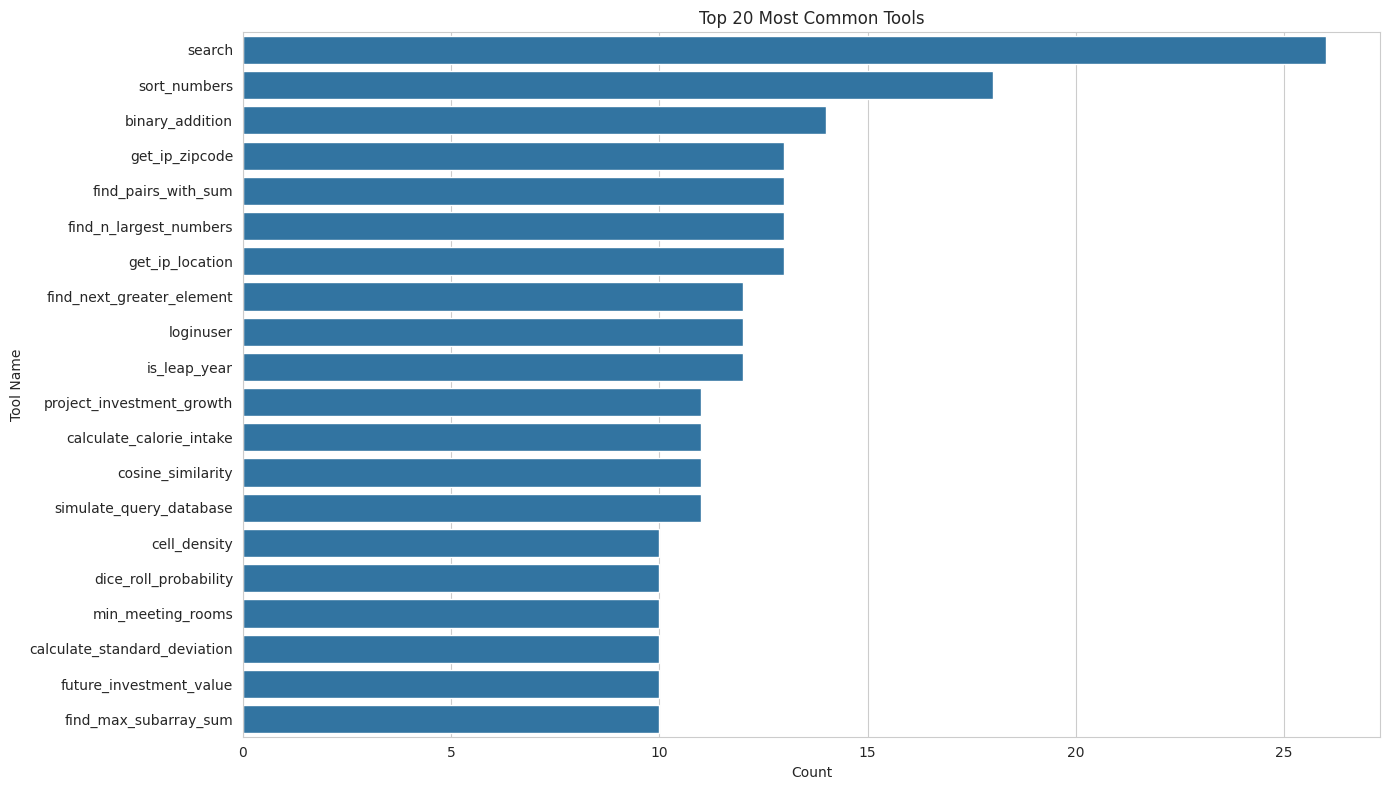

In [5]:
# Count tool usage
tool_counts = {}

# Only analyze a portion of the dataset for performance
sample_size = 1000
print(f"Analyzing {sample_size} entries from the dataset...")

# Process entries with error handling
for i in range(min(sample_size, len(dataset['train']))):
    if i % 100 == 0:
        print(f"Processed {i}/{sample_size} entries")
    
    try:
        entry = dataset['train'][i]
        parsed = parse_json_entry(entry)
        tools = parsed.get('tools', [])
        
        if isinstance(tools, list):
            for tool in tools:
                if isinstance(tool, dict) and 'name' in tool:
                    name = tool['name']
                    tool_counts[name] = tool_counts.get(name, 0) + 1
    except Exception as e:
        print(f"Error processing entry {i}: {e}")
        continue

print(f"Finished processing {sample_size} entries")

# Create a DataFrame for visualization
tool_df = pd.DataFrame({
    'tool': list(tool_counts.keys()),
    'count': list(tool_counts.values())
})

# Sort by count
tool_df = tool_df.sort_values('count', ascending=False).reset_index(drop=True)

# Display top tools in table format
print("\nTop 20 most common tools:")
display(tool_df.head(20))

# Plot the top 20 most common tools
plt.figure(figsize=(14, 8))
top_tools = tool_df.head(20)
sns.barplot(x='count', y='tool', data=top_tools)
plt.title('Top 20 Most Common Tools')
plt.xlabel('Count')
plt.ylabel('Tool Name')
plt.tight_layout()
plt.show()

### Query Length Analysis

Let's analyze the distribution of query lengths.

Analyzing 1000 entries from the dataset...
Processed 0/1000 entries
Processed 100/1000 entries
Processed 200/1000 entries
Processed 300/1000 entries
Processed 400/1000 entries
Processed 500/1000 entries
Processed 600/1000 entries
Processed 700/1000 entries
Processed 800/1000 entries
Processed 900/1000 entries
Finished processing 1000 entries


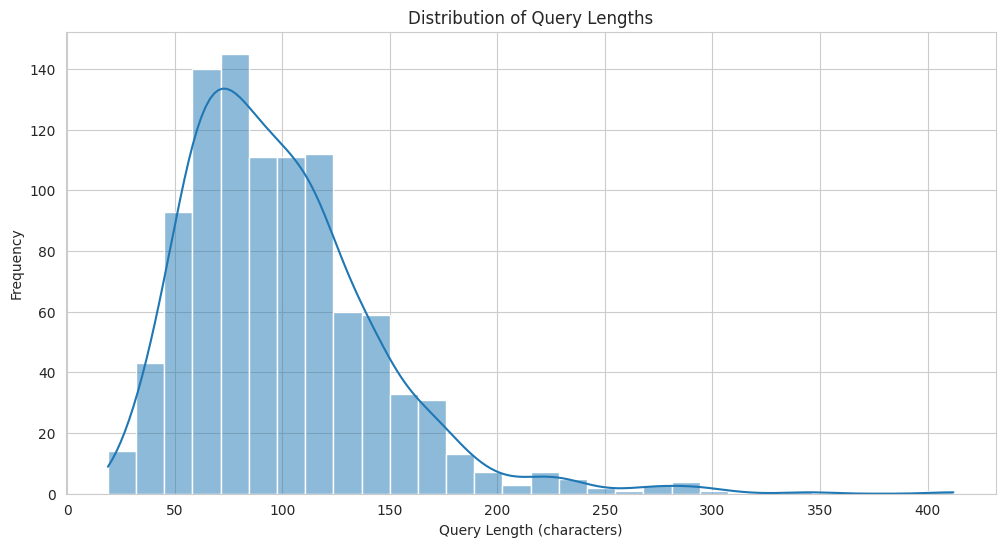


Query Length Statistics:
count    1000.000000
mean       99.506000
std        45.115955
min        19.000000
25%        67.000000
50%        92.000000
75%       121.000000
max       412.000000
dtype: float64


In [6]:
# Calculate query lengths
query_lengths = []

# Only analyze a portion of the dataset for performance
sample_size = 1000
print(f"Analyzing {sample_size} entries from the dataset...")

for i in range(min(sample_size, len(dataset['train']))):
    if i % 100 == 0:
        print(f"Processed {i}/{sample_size} entries")
    
    try:
        entry = dataset['train'][i]
        parsed = parse_json_entry(entry)
        query = parsed.get('query', '')
        
        if isinstance(query, str):
            query_lengths.append(len(query))
    except Exception as e:
        print(f"Error processing entry {i}: {e}")
        continue

print(f"Finished processing {sample_size} entries")

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.histplot(query_lengths, kde=True, bins=30)
plt.title('Distribution of Query Lengths')
plt.xlabel('Query Length (characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print summary statistics
query_length_series = pd.Series(query_lengths)
print('\nQuery Length Statistics:')
print(query_length_series.describe())

### Parameter Analysis

Let's analyze the number of parameters per tool.

Analyzing 1000 entries from the dataset...
Processed 0/1000 entries
Processed 100/1000 entries
Processed 200/1000 entries
Processed 300/1000 entries
Processed 400/1000 entries
Processed 500/1000 entries
Processed 600/1000 entries
Processed 700/1000 entries
Processed 800/1000 entries
Processed 900/1000 entries
Finished processing 1000 entries


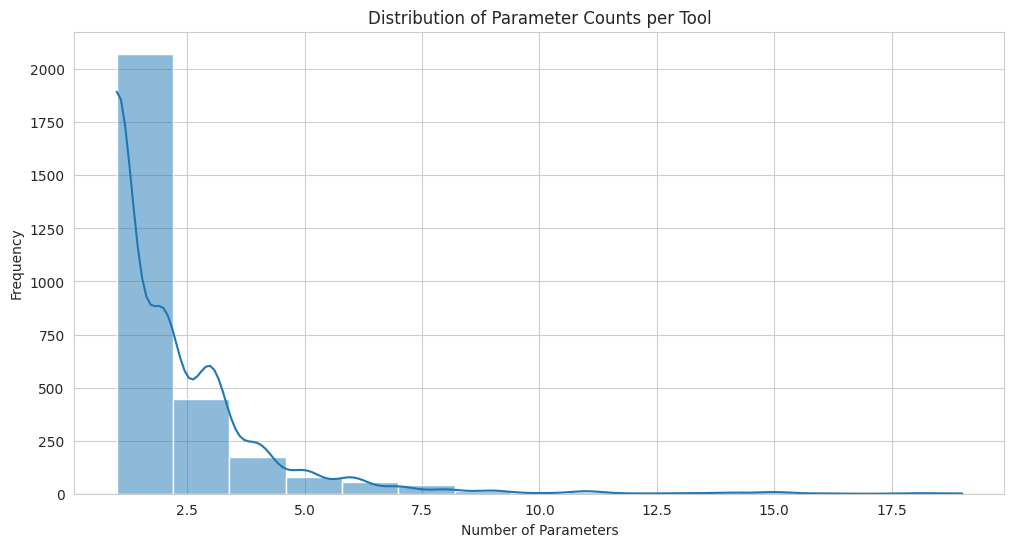

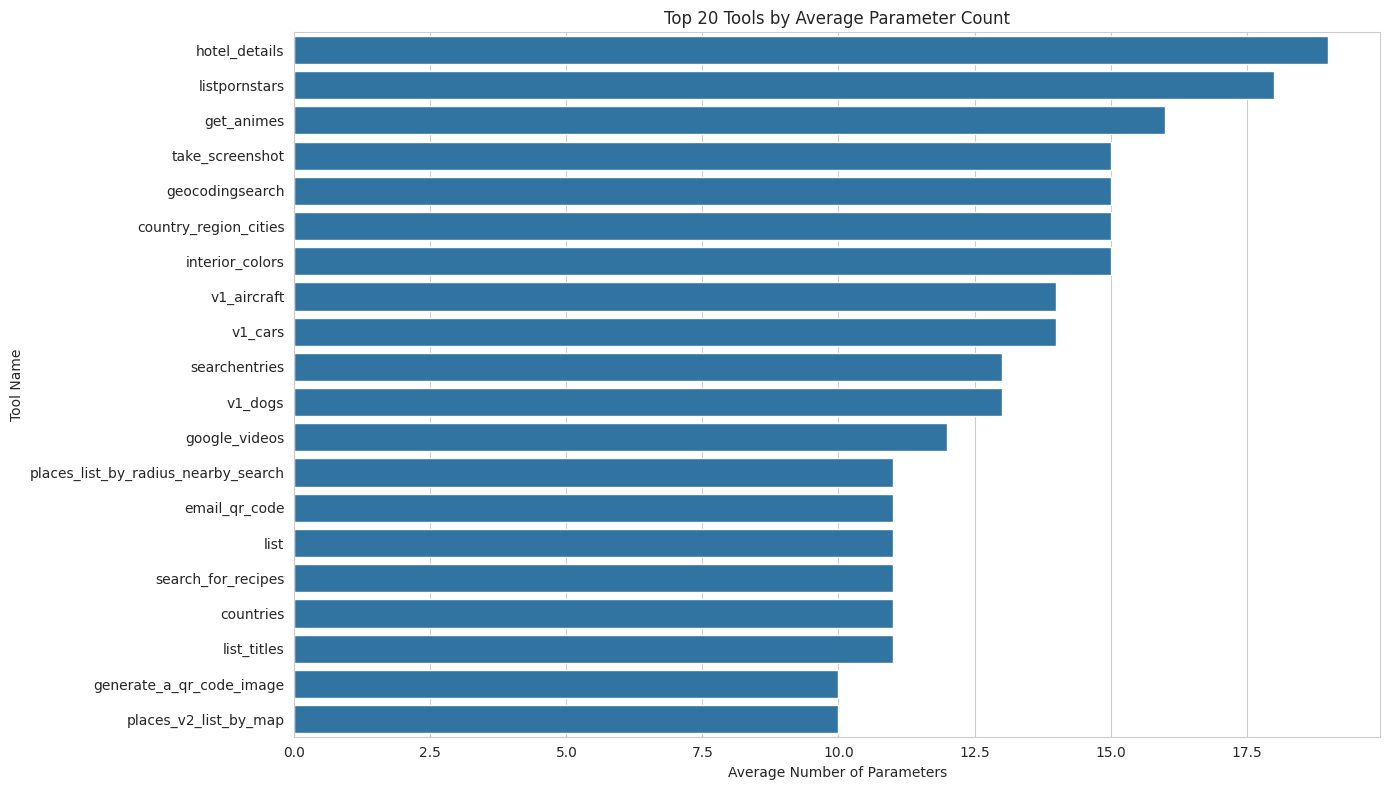

In [7]:
# Calculate number of parameters per tool
param_counts = []
tool_param_data = []

# Only analyze a portion of the dataset for performance
sample_size = 1000
print(f"Analyzing {sample_size} entries from the dataset...")

for i in range(min(sample_size, len(dataset['train']))):
    if i % 100 == 0:
        print(f"Processed {i}/{sample_size} entries")
    
    try:
        entry = dataset['train'][i]
        parsed = parse_json_entry(entry)
        tools = parsed.get('tools', [])
        
        if isinstance(tools, list):
            for tool in tools:
                if isinstance(tool, dict) and 'name' in tool and 'parameters' in tool:
                    name = tool['name']
                    params = tool['parameters']
                    param_count = len(params)
                    param_counts.append(param_count)
                    tool_param_data.append({
                        'tool': name,
                        'param_count': param_count
                    })
    except Exception as e:
        print(f"Error processing entry {i}: {e}")
        continue

print(f"Finished processing {sample_size} entries")

# Create a DataFrame
param_df = pd.DataFrame(tool_param_data)

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.histplot(param_counts, kde=True, bins=15)
plt.title('Distribution of Parameter Counts per Tool')
plt.xlabel('Number of Parameters')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate average parameters per tool
tool_avg_params = param_df.groupby('tool')['param_count'].mean().reset_index()
tool_avg_params = tool_avg_params.sort_values('param_count', ascending=False)

# Plot top 20 tools by average parameter count
plt.figure(figsize=(14, 8))
top_param_tools = tool_avg_params.head(20)
sns.barplot(x='param_count', y='tool', data=top_param_tools)
plt.title('Top 20 Tools by Average Parameter Count')
plt.xlabel('Average Number of Parameters')
plt.ylabel('Tool Name')
plt.tight_layout()
plt.show()

## Examining Specific Tools

Let's look at examples of a specific tool in use.

In [8]:
# Check if we have tool_df from earlier cells
try:
    # Choose a tool from the top tools we saw earlier
    target_tool = tool_df.iloc[0]['tool']  # Most common tool
except NameError:
    # If tool_df is not available, choose a default tool
    print("tool_df not available. Using a default tool.")
    if len(tool_names) > 0:
        target_tool = tool_names[0]
    else:
        # If we don't have tool names, get from first sample
        try:
            sample = dataset['train'][0]
            parsed = parse_json_entry(sample)
            tools = parsed.get('tools', [])
            if len(tools) > 0 and isinstance(tools[0], dict) and 'name' in tools[0]:
                target_tool = tools[0]['name']
            else:
                print("Could not find a valid tool to examine")
                target_tool = None
        except Exception as e:
            print(f"Error accessing first sample: {e}")
            target_tool = None

if target_tool:
    print(f'Looking at examples of tool: {target_tool}')
    
    # Filter entries using this tool
    filtered_entries = filter_by_tool(dataset, target_tool)
    print(f'Found {len(filtered_entries)} entries using this tool')
    
    if filtered_entries:
        # Display a sample
        sample_entry = filtered_entries[0]
        
        print(f'\nSample Query:\n{sample_entry["query"]}')
        
        # Find the tool details
        tool_details = None
        for tool in sample_entry['tools']:
            if tool['name'] == target_tool:
                tool_details = tool
                break
        
        if tool_details:
            print(f'\nTool Description:\n{tool_details["description"]}')
            print('\nParameters:')
            for param_name, param_details in tool_details['parameters'].items():
                print(f'  - {param_name}: {param_details["type"]} - {param_details["description"]}')
        
        # Find the corresponding answer
        answer = None
        for ans in sample_entry['answers']:
            if ans['name'] == target_tool:
                answer = ans
                break
        
        if answer:
            print('\nArguments Used:')
            for arg_name, arg_value in answer['arguments'].items():
                print(f'  - {arg_name}: {arg_value}')
    else:
        print("No entries found using this tool")

Looking at examples of tool: search
Found 2124 entries using this tool

Sample Query:
Find articles from the last week about COVID-19 in the UK. Also, suggest keywords for 'healthcare technology'.

Tool Description:
Perform a Google search and retrieve the search results using the specified parameters.

Parameters:
  - q: str - The search query term.
  - gl: str, optional - The geographic location of the search results (e.g., 'US'). Defaults to None.
  - cr: str, optional - The country of the search results (e.g., 'countryUS'). Defaults to None.
  - tbs: str, optional - The time-based search parameters (e.g., 'qdr:d' for past 24 hours). Defaults to None.
  - num: int, optional - The number of search results to return. Defaults to 20.
  - start: int, optional - The index of the first result to return. Defaults to None.
  - hl: str, optional - The language of the search results (e.g., 'en'). Defaults to None.

Arguments Used:
  - q: COVID-19
  - gl: UK
  - tbs: qdr:w


## Conclusion

In this notebook, we've explored the basic structure and characteristics of the Salesforce/xlam-function-calling-60k dataset. The dataset contains a diverse set of function calling examples with tools, parameters, and usage patterns.